In [2]:
import os
os.chdir("/home/akshayr/honours_thesis/School_Work/Honours_Thesis/threepoint_py_GGL/threepoint_py_GGL")
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
# import healsparse
from scipy.signal import savgol_filter
from numpy.linalg import inv
from scipy.optimize import minimize
from cosmopower_NN_new import cosmopower_NN
import niceplots.utils as nicepl
# nicepl.initPlot()

2025-04-01 22:25:41.432830: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 22:25:41.496563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 22:25:42.187000: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 22:25:42.775707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743560743.256289  125346 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743560743.67

In [3]:
# from matplotlib import rc
# rc('text', usetex=True)
# rc('font', family='serif')

# SMALL_SIZE = 8
# MEDIUM_SIZE = 15
# BIGGER_SIZE = 20

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = (5, 4)  # Adjust width & height
# plt.rcParams["figure.dpi"] = 100  # Lower DPI for smaller display


In [ ]:
test_sample = np.arange(2000,2600)

params = np.load('params_4_emualtion_notomo.npz')
para_names = params['para_names']
params = params['samples']
test_params = {}
for i in range(len(para_names)):
    test_params[para_names[i]]=params[:,i][test_sample]


2635


In [16]:
test_params['a'].shape

(600,)

In [6]:
parameters = Table.read("/home/akshayr/honours_thesis/School_Work/Honours_Thesis/parameters_4_training_100HOD.fits")
parameters[5]

# omega_cdm, sigma8, omega_b, n_s, a, c, x0, n

omega_b,omega_cdm,n_s,alpha_s,N_ur,w0_fld,wa_fld,log_M_0,log_M_1,gamma_1,gamma_2,sigma_c,a_1,b_0,b_1,s,Bcent,Bsat,sigma8
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.02237,0.12,0.9649,0.0,2.0328,-1.0,0.0,11.017364504074513,11.14460742306233,20.173169748424247,0.05860146308890926,0.29937597904785007,3.380871320437387,0.19999837593928593,0.23530159874334522,-1.8308010502198506,0.6645242028582004,-1.328610920111882,0.8076409582450294


In [ ]:
test_features = np.load('/home/akshayr/honours_thesis/School_Work/Honours_Thesis/threepoint_py_GGL/threepoint_py_GGL/delta_sigma_output/delta_sigma_models.npy')[test_sample]

test_features.shape

(600, 10)

In [8]:
delta_sigma_emu = cosmopower_NN(restore=True, restore_filename='/home/akshayr/honours_thesis/School_Work/Honours_Thesis/threepoint_py_GGL/threepoint_py_GGL/delta_sigma_emu')

emu_features=delta_sigma_emu.ten_to_rescaled_predictions_np(test_params)
emu_features[0]



2025-04-01 13:17:14.606178: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


array([7.49208165, 2.46809585, 1.12339684, 0.9407205 , 0.74045549,
       0.57202982, 0.46187165, 0.3634674 , 0.26732565, 0.17170296])

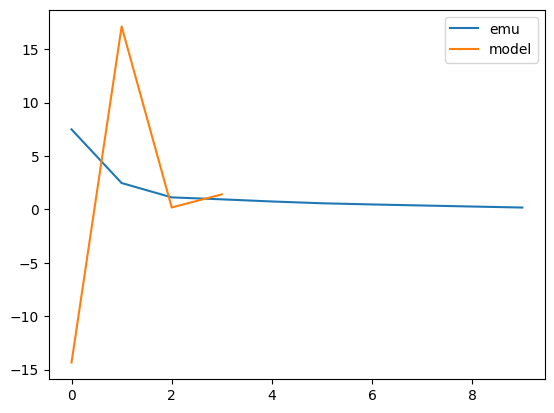

In [12]:
for i in range(1): 
    plt.plot(emu_features[i], label='emu')
    plt.plot(test_features[i], label='model')
    plt.legend()
    # plt.title(str(i))
    plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_113288/979634709.py:12: SyntaxWarning: invalid escape sequence '\%'
  plt.fill_between(bins, percentiles2[0,:], percentiles2[1,:], color = 'red', label = '$95\%$', alpha = 0.7)
/tmp/ipykernel_113288/979634709.py:13: SyntaxWarning: invalid escape sequence '\%'
  plt.fill_between(bins, percentiles1[0,:], percentiles1[1,:], color = 'darkred', label = '$68\%$', alpha = 1)


(600, 10)


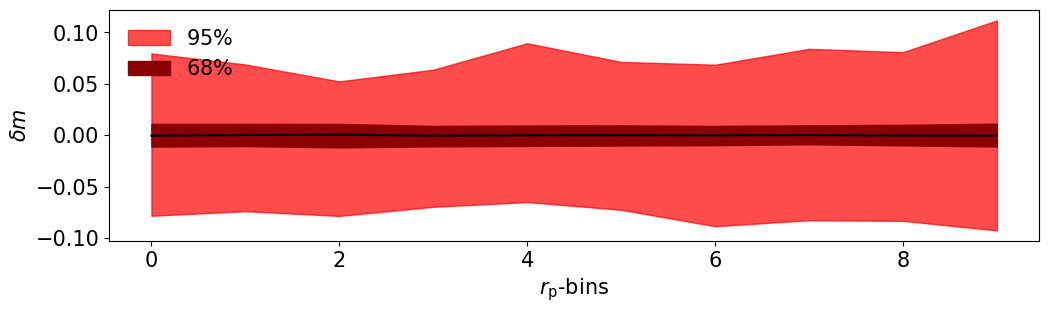

In [10]:

diff=(test_features/emu_features-1)
print(diff.shape)
mean_diff = np.percentile(diff, 50, axis = 0)

bins=range(diff.shape[1])
percentiles1 = np.percentile(diff, [16,84], axis = 0)
percentiles2 = np.percentile(diff, [2.5,97.5], axis = 0)
percentiles3 = np.percentile(diff, [0.5,99.5], axis = 0)

plt.figure(figsize=(12, 3),dpi=100)
# plt.fill_between(bins, percentiles3[0,:], percentiles3[1,:], color = 'salmon', label = '$99\%$', alpha=0.8)
plt.fill_between(bins, percentiles2[0,:], percentiles2[1,:], color = 'red', label = '$95\%$', alpha = 0.7)
plt.fill_between(bins, percentiles1[0,:], percentiles1[1,:], color = 'darkred', label = '$68\%$', alpha = 1)
plt.plot(bins,mean_diff,'-',color='black')
#plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r"$r_\mathrm{p}$-bins", fontsize=15)
plt.ylabel(r"$\delta m$", fontsize=15)
plt.legend(frameon=False, fontsize=15, loc='upper left')
# plt.ylabel(r'$(\langle M^2_\mathrm{ap}\rangle^{\mathrm{emu}} - \langle M^2_\mathrm{ap}\rangle^{\mathrm{true}})/  \langle M^2_\mathrm{ap}\rangle^{\mathrm{true}}$', fontsize=15)
# plt.title(r'900 nodes',size=15)

# plt.ylim(-0.1,0.1)
# plt.savefig('plots/emulator_accuracy_withk.jpg',dpi=400,bbox_inches='tight')
plt.show()




In [45]:
emulator_low_params = np.load('emulator_low_params.npz')
features = emulator_low_params['b_emulator']
chi2_vals = emulator_low_params['chi2_vals'].flatten()
valid_fits = (chi2_vals<10)&(features[:,2]>-2.5)

features = features[valid_fits]
print(features.shape)
train_sample = np.random.choice(range(features.shape[0]), int(features.shape[0]*0.9), replace=False)
test_sample = np.setdiff1d(np.arange(features.shape[0]), train_sample)

# emulator_low_params = np.load('emulator_low_params.npz')
train_features = features[train_sample]
test_features = features[test_sample]

HOD_2_bias_emu = cosmopower_NN(restore=True, restore_filename='/home/akshayr/honours_thesis/School_Work/Honours_Thesis/threepoint_py_GGL/threepoint_py_GGL/HOD_2_bias_emu')

table_params = Table.read('/home/akshayr/honours_thesis/School_Work/Honours_Thesis/parameters_4_training_100HOD.fits')[valid_fits]
para_names = table_params.colnames

test_params = {}
for i in range(len(para_names)):
    test_params[para_names[i]]=table_params[para_names[i]][test_sample]

emu_features=HOD_2_bias_emu.rescaled_predictions_np(test_params)

(4201, 4)


In [46]:
emu_features.shape

(421, 4)

<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_113288/1739814597.py:12: SyntaxWarning: invalid escape sequence '\%'
  plt.fill_between(bins, percentiles2[0,:], percentiles2[1,:], color = 'red', label = '$95\%$', alpha = 0.7)
/tmp/ipykernel_113288/1739814597.py:13: SyntaxWarning: invalid escape sequence '\%'
  plt.fill_between(bins, percentiles1[0,:], percentiles1[1,:], color = 'darkred', label = '$68\%$', alpha = 1)


[-6.82516105 10.25101351  0.49555119  0.60390693] [-6.82242171 10.19435875  0.4967719   0.60870444]


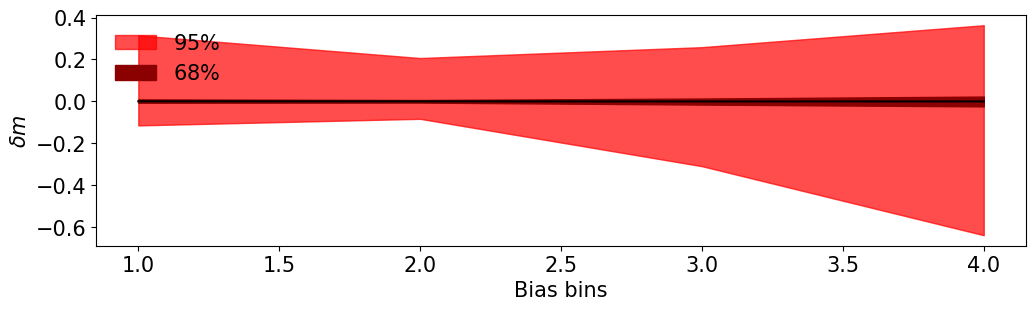

In [50]:

diff=(test_features/emu_features-1)
print(test_features[0],emu_features[0])
mean_diff = np.percentile(diff, 50, axis = 0)

bins=range(1,diff.shape[1]+1,1)
percentiles1 = np.percentile(diff, [16,84], axis = 0)
percentiles2 = np.percentile(diff, [2.5,97.5], axis = 0)
percentiles3 = np.percentile(diff, [0.5,99.5], axis = 0)

plt.figure(figsize=(12, 3),dpi=100)
# plt.fill_between(bins, percentiles3[0,:], percentiles3[1,:], color = 'salmon', label = '$99\%$', alpha=0.8)
plt.fill_between(bins, percentiles2[0,:], percentiles2[1,:], color = 'red', label = '$95\%$', alpha = 0.7)
plt.fill_between(bins, percentiles1[0,:], percentiles1[1,:], color = 'darkred', label = '$68\%$', alpha = 1)
plt.plot(bins,mean_diff,'-',color='black')
#plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r"Bias bins", fontsize=15)
plt.ylabel(r"$\delta m$", fontsize=15)
plt.legend(frameon=False, fontsize=15, loc='upper left')
# plt.ylabel(r'$(\langle M^2_\mathrm{ap}\rangle^{\mathrm{emu}} - \langle M^2_\mathrm{ap}\rangle^{\mathrm{true}})/  \langle M^2_\mathrm{ap}\rangle^{\mathrm{true}}$', fontsize=15)
# plt.title(r'900 nodes',size=15)

# plt.ylim(-0.1,0.1)
# plt.savefig('plots/emulator_accuracy_withk.jpg',dpi=400,bbox_inches='tight')
plt.show()


